In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 13]

# Data Cleaning and Preprocessing

In [2]:
#data selection 
coviddf = pd.read_csv('covid data.csv')
coviddf = coviddf[coviddf['date'] == '31/10/2020']
coviddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 227 to 59942
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            214 non-null    object 
 1   continent                           213 non-null    object 
 2   location                            215 non-null    object 
 3   date                                215 non-null    object 
 4   total_cases                         214 non-null    float64
 5   new_cases                           213 non-null    float64
 6   new_cases_smoothed                  212 non-null    float64
 7   total_deaths                        192 non-null    float64
 8   new_deaths                          213 non-null    float64
 9   new_deaths_smoothed                 212 non-null    float64
 10  total_cases_per_million             213 non-null    float64
 11  new_cases_per_million               213 n

In [3]:
#adding the infection Rate

coviddf['Infection Rate %'] = coviddf['total_cases']/ coviddf['population'] * 100
coviddf['Mortality Rate %'] = coviddf['total_deaths'] /coviddf['total_cases'] * 100
coviddf

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Infection Rate %,Mortality Rate %
227,ABW,North America,Aruba,31/10/2020,4472.0,17.0,10.143,37.0,0.0,0.143,...,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,4.188599,0.827370
562,AFG,Asia,Afghanistan,31/10/2020,41425.0,157.0,105.429,1536.0,4.0,4.143,...,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,0.106413,3.707906
815,AGO,Africa,Angola,31/10/2020,10269.0,195.0,241.000,275.0,0.0,2.143,...,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,0.031245,2.677963
1063,AIA,North America,Anguilla,31/10/2020,3.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN,0.019997,NaN
1329,ALB,Europe,Albania,31/10/2020,20634.0,319.0,296.857,502.0,3.0,4.714,...,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,0.717006,2.432878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58762,ZAF,Africa,South Africa,31/10/2020,723682.0,1912.0,1610.000,19230.0,66.0,48.429,...,200.380,5.52,8.100,33.200,43.993,2.320,64.13,0.699,1.220196,2.657244
59018,ZMB,Africa,Zambia,31/10/2020,16415.0,90.0,45.714,349.0,1.0,0.429,...,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,0.089290,2.126104
59272,ZWE,Africa,Zimbabwe,31/10/2020,8362.0,13.0,15.000,242.0,0.0,0.857,...,307.846,1.82,1.600,30.700,36.791,1.700,61.49,0.535,0.056261,2.894044
59607,OWID_WRL,NaN,World,31/10/2020,45726736.0,542158.0,485363.857,1190157.0,7323.0,6388.429,...,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,0.586631,2.602760


In [4]:
coviddf1 = coviddf[['iso_code','location', 'Infection Rate %', 'Mortality Rate %', 'total_cases', 'total_deaths', 'gdp_per_capita', 'population_density', 'continent']]

#check if any of the values duplicated
coviddf1.duplicated()


227      False
562      False
815      False
1063     False
1329     False
         ...  
58762    False
59018    False
59272    False
59607    False
59942    False
Length: 215, dtype: bool

In [5]:
#rename the index using list comprehension
#renaming the columns
idx = [i for i in range(len(coviddf1))]
coviddf1.index = idx
coviddf1 = coviddf1.rename(columns = {'gdp_per_capita' : 'GDP per Capita', 'iso_code': "ISO", 'location' : 'Country', 'total_cases' : 'Total Cases'})
coviddf1 = coviddf1.rename(columns = {'total_deaths': 'Total Deaths', 'population_density' : 'Population Density', 'population': 'Population', 'continent': 'Continent'})

In [6]:
coviddf1 = coviddf1[coviddf1['Mortality Rate %'].notna()]
coviddf1 = coviddf1[coviddf1['Infection Rate %'].notna()]
coviddf1.isnull().sum()

ISO                    0
Country                0
Infection Rate %       0
Mortality Rate %       0
Total Cases            0
Total Deaths           0
GDP per Capita        20
Population Density     8
Continent              1
dtype: int64

In [7]:
#preparing poverty dataframe
povertydf = pd.read_csv('GiniIndex.csv')
povertydf.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Most Recent Gini Index
0,Aruba,ABW,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,51.3
3,Albania,ALB,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,33.2
4,Andorra,AND,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
povertydf = povertydf[['Country Code', 'Most Recent Gini Index']]
col = povertydf.loc[: , "Most Recent Gini Index"]

povertydf = povertydf[povertydf['Most Recent Gini Index'].notna()]
povertydf = povertydf.rename(columns = {'Country Code':'ISO'})
povertydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 2 to 263
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ISO                     109 non-null    object 
 1   Most Recent Gini Index  109 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [9]:
#left join 
df = pd.merge(left=coviddf1, right=povertydf, how = 'left', left_on='ISO', right_on='ISO')
df

,ISO,Country,Infection Rate %,Mortality Rate %,Total Cases,Total Deaths,GDP per Capita,Population Density,Continent,Most Recent Gini Index
0,ABW,Aruba,4.188599,0.827370,4472.0,37.0,35973.781,584.800,North America,NaN
1,AFG,Afghanistan,0.106413,3.707906,41425.0,1536.0,1803.987,54.422,Asia,NaN
2,AGO,Angola,0.031245,2.677963,10269.0,275.0,5819.495,23.890,Africa,51.3
3,ALB,Albania,0.717006,2.432878,20634.0,502.0,11803.431,104.871,Europe,33.2
4,AND,Andorra,6.037663,1.607717,4665.0,75.0,NaN,163.755,Europe,NaN
...,...,...,...,...,...,...,...,...,...,...
186,YEM,Yemen,0.006917,29.083858,2063.0,600.0,1479.147,53.508,Asia,NaN
187,ZAF,South Africa,1.220196,2.657244,723682.0,19230.0,12294.876,46.754,Africa,NaN
188,ZMB,Zambia,0.089290,2.126104,16415.0,349.0,3689.251,22.995,Africa,57.1
189,ZWE,Zimbabwe,0.056261,2.894044,8362.0,242.0,1899.775,42.729,Africa,44.3


In [10]:
#preparing the internet dataframe
internetdf = pd.read_csv('Internet.csv')
internetdf = internetdf[['ISO CODE', '2017']]
col = internetdf.loc[: , "2017"]
internetdf['Proportion of Internet Users in the Population in 2017'] = col/100
internetdf = internetdf.rename(columns = {'ISO CODE' : 'ISO'})
internetdf = internetdf.drop(columns = '2017')
internetdf

,ISO,Proportion of Internet Users in the Population in 2017
0,ABW,0.971700
1,AFG,0.114477
2,AGO,0.143391
3,ALB,0.718470
4,AND,0.915675
...,...,...
259,XKX,0.838936
260,YEM,0.267184
261,ZAF,0.561674
262,ZMB,0.278526


In [11]:
#left join with the covidfdf1 and internet df
df = pd.merge(left=df, right=internetdf, how = 'left', left_on='ISO', right_on='ISO')
df.isnull().sum()


ISO                                                        0
Country                                                    0
Infection Rate %                                           0
Mortality Rate %                                           0
Total Cases                                                0
Total Deaths                                               0
GDP per Capita                                            20
Population Density                                         8
Continent                                                  1
Most Recent Gini Index                                    87
Proportion of Internet Users in the Population in 2017    16
dtype: int64

In [12]:
df.tail(10)

,ISO,Country,Infection Rate %,Mortality Rate %,Total Cases,Total Deaths,GDP per Capita,Population Density,Continent,Most Recent Gini Index,Proportion of Internet Users in the Population in 2017
181,VEN,Venezuela,0.322089,0.865824,91589.0,793.0,16745.022,36.253,South America,NaN,0.643134
182,VGB,British Virgin Islands,0.238119,1.388889,72.0,1.0,NaN,207.973,North America,NaN,0.777043
183,VIR,United States Virgin Islands,1.304310,1.541850,1362.0,21.0,NaN,306.480,North America,NaN,0.643775
184,VNM,Vietnam,0.001209,2.973662,1177.0,35.0,6171.884,308.127,Asia,35.7,0.581400
185,OWID_KOS,Kosovo,1.000013,3.507864,19328.0,678.0,9795.834,168.155,Europe,NaN,NaN
186,YEM,Yemen,0.006917,29.083858,2063.0,600.0,1479.147,53.508,Asia,NaN,0.267184
187,ZAF,South Africa,1.220196,2.657244,723682.0,19230.0,12294.876,46.754,Africa,NaN,0.561674
188,ZMB,Zambia,0.089290,2.126104,16415.0,349.0,3689.251,22.995,Africa,57.1,0.278526
189,ZWE,Zimbabwe,0.056261,2.894044,8362.0,242.0,1899.775,42.729,Africa,44.3,0.270555
190,OWID_WRL,World,0.586631,2.602760,45726736.0,1190157.0,15469.207,58.045,NaN,NaN,NaN


In [13]:
df.to_csv('main.csv')
#we export it to another csv file so another notebook can be used

# Data Vizualization and Analysis

In [14]:
#a function that removes outliers given a specific column

def removeoutlier(dataframe, column):
    Q1 = df[column].quantile(0.25)
    Q3  = df[column].quantile(0.75)
    IQR = Q3 - Q1
    dataframeOUT = dataframe.loc[(dataframe[column] > Q1-1.5*IQR) & (dataframe[column] < Q3+1.5*IQR)]
    return dataframeOUT
    

In [15]:
#importing the preprocessed data from the data cleaning process
df = pd.read_csv('main.csv')
df = df.drop(columns = 'Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ISO                                                     191 non-null    object 
 1   Country                                                 191 non-null    object 
 2   Infection Rate %                                        191 non-null    float64
 3   Mortality Rate %                                        191 non-null    float64
 4   Total Cases                                             191 non-null    float64
 5   Total Deaths                                            191 non-null    float64
 6   GDP per Capita                                          171 non-null    float64
 7   Population Density                                      183 non-null    float64
 8   Continent                               

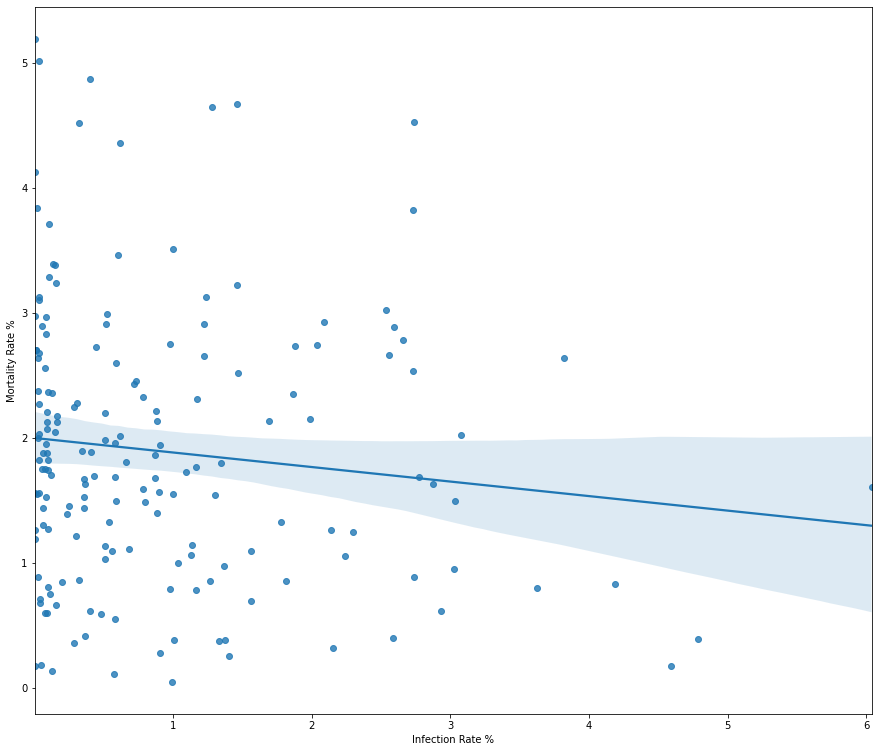

In [16]:
basedf = removeoutlier(df, "Infection Rate %")
basedf = removeoutlier(df, "Mortality Rate %")
sns.regplot(scatter = True, data = basedf, fit_reg = True, x = 'Infection Rate %', y = 'Mortality Rate %')

# Correlation between Socio-Economic factors and Infection Rate, Mortality Rate

# GDP Per Capita vs Infection Rate & Mortality Rate

[Text(0.5, 0, 'GDP per Capita (2019)')]

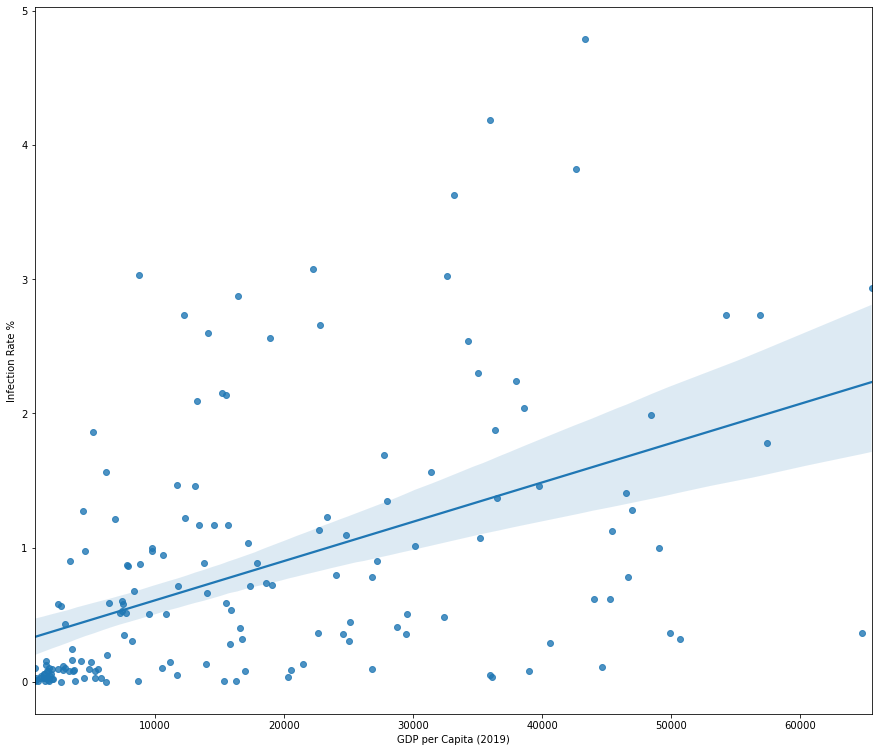

In [17]:
GDPdf = removeoutlier(df, 'GDP per Capita')
GDPfig1 = sns.regplot(scatter = True, data = GDPdf, fit_reg = True, x = 'GDP per Capita', y = 'Infection Rate %')
GDPfig1.set(xlabel = "GDP per Capita (2019)")

[Text(0.5, 0, 'GDP per Capita (2019)')]

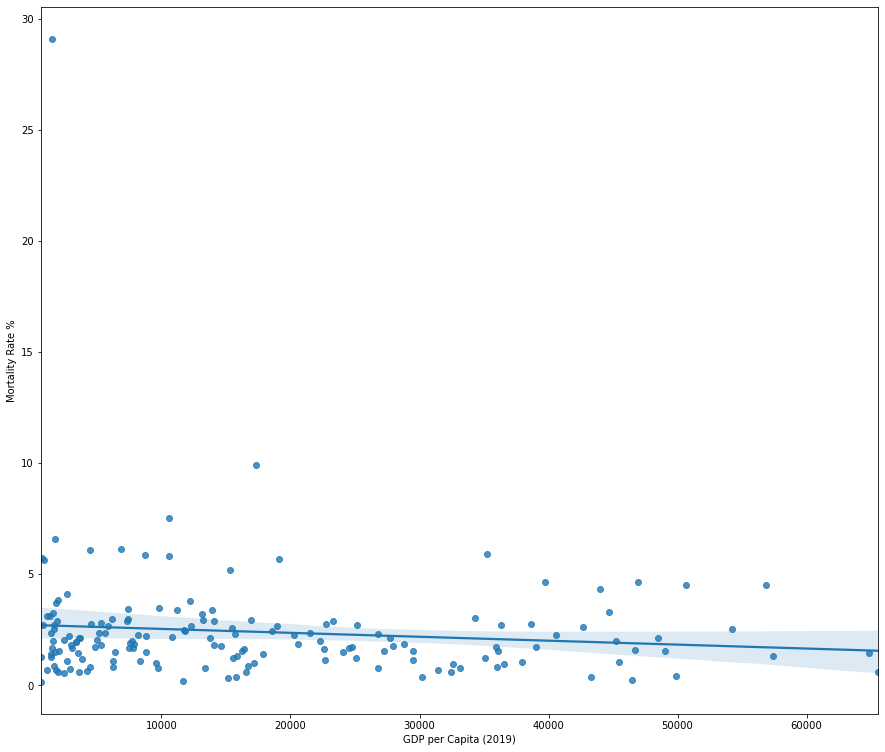

In [18]:
GDPfig2 = sns.regplot(scatter = True, data = GDPdf, fit_reg = True, x = 'GDP per Capita', y = 'Mortality Rate %')
GDPfig2.set(xlabel = "GDP per Capita (2019)")

# Hypothesis Testing for GDP per Capita

Null Hypothesis 1: There is no correlation between GDP per Capita and Infection Rate

Null Hypothesis 2: There is no correlation between GDP per Capita and Mortality Rate

Alternative Hypothesis 1: There is a correlation between GDP per Capita and Infection Rate

Alternative Hypothesis 2: There is a correlation between GDP per Capita and Mortality Rate

We'll be using a two tailed test with a 5% confidence interval (95% confidence interval).
As long as the P value is smaler than 0.05, we can reject the null hypothesis and affirm our alternative hypothesis. 


In [19]:
r11 = st.pearsonr(x = GDPdf['GDP per Capita'], y = GDPdf['Infection Rate %'])
print("The correlation coefficient between GDP per Capita and Infection Rate is", r11[0])
print("The P value is", r11[1], "therefore our null hypothesis is rejected.")


r12 = st.pearsonr(x = GDPdf['GDP per Capita'], y = GDPdf['Mortality Rate %'])
print("The correlation coefficient between GDP per Capita and Mortality Rate is", r12[0])
print("The P value is", r12[1], "therefore we fail to reject out null hypothesis.")



The correlation coefficient between GDP per Capita and Infection Rate is 0.48187389417746707
The P value is 5.6434496050079624e-11 therefore our null hypothesis is rejected.
The correlation coefficient between GDP per Capita and Mortality Rate is -0.10820772838279438
The P value is 0.16652624148179718 therefore we fail to reject out null hypothesis.


# Population Density vs Infection Rate and Mortality Rate

In [20]:
Popdf = removeoutlier(df, 'Population Density')

[Text(0.5, 0, 'Population Density 2019 (People per Square Kilometer of Land Area)')]

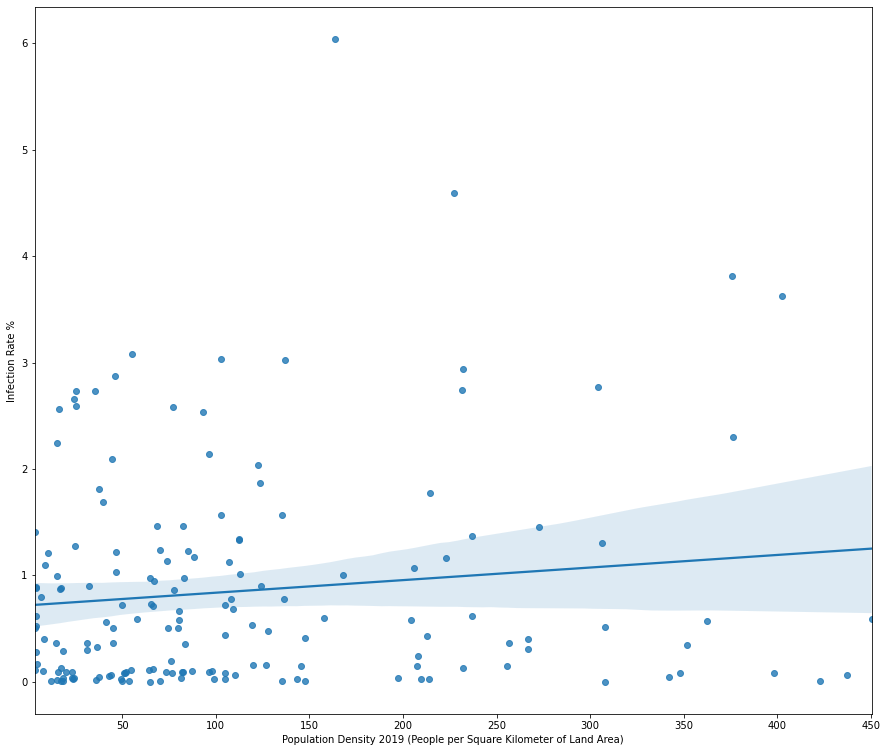

In [21]:
popfig1 = sns.regplot(scatter = True, data = Popdf, fit_reg = True, x = 'Population Density', y = 'Infection Rate %')
popfig1.set(xlabel = "Population Density 2019 (People per Square Kilometer of Land Area)")

[Text(0.5, 0, 'Population Density 2019 (People per Square Kilometer of Land Area)')]

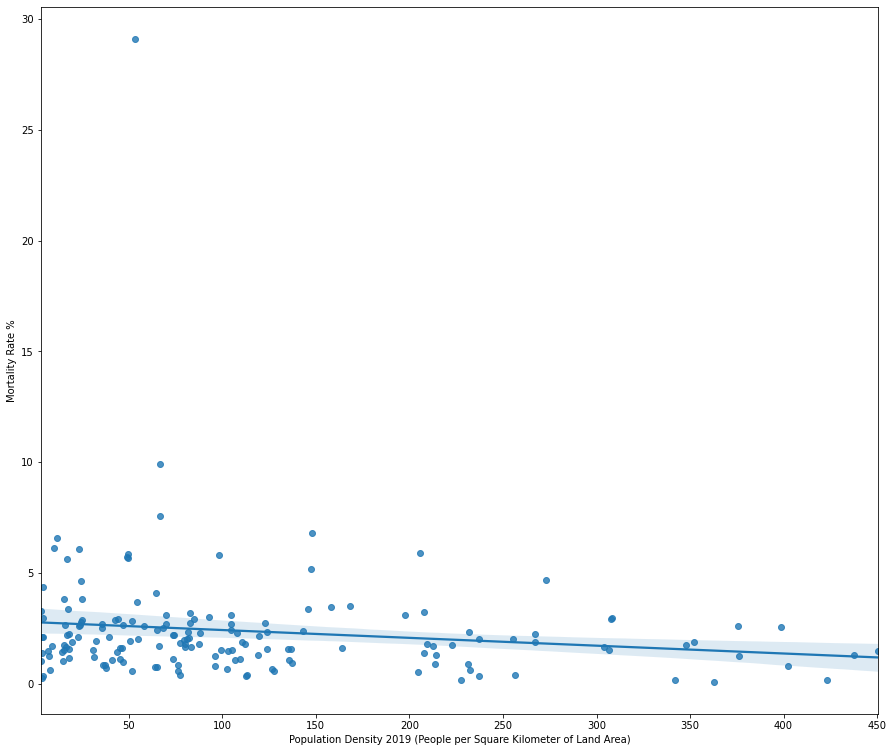

In [22]:
popfig2 = sns.regplot(scatter = True, data = Popdf, fit_reg = True, x = 'Population Density', y = 'Mortality Rate %')


popfig2.set(xlabel = "Population Density 2019 (People per Square Kilometer of Land Area)")

# Hypothesis Testing for Population Density

Null Hypothesis 1: There is no correlation between Population Density and Infection Rate

Null Hypothesis 2: There is no correlation between Population Density and Mortality Rate

Alternative Hypothesis 1: There is a correlation between Population Density and Infection Rate

Alternative Hypothesis 2: There is a correlation between Population Density and Mortality Rate

We'll be using a two tailed test with a 5% confidence interval (95% confidence interval). As long as the P value is smaler than 0.05, we can reject the null hypothesis and affirm our alternative hypothesis.


In [23]:
r21 = st.pearsonr(x = Popdf['Population Density'], y = Popdf['Infection Rate %'])
print("The correlation coefficient between Population Density and Infection Rate is", r21[0])
print("The P value is", r21[1], "therefore we fail to reject our null hypothesis.")

r22 = st.pearsonr(x = Popdf['Population Density'], y = Popdf['Mortality Rate %'])
print("The correlation coefficient between Population Density and Mortality Rate is", r22[0])
print("The P value is", r22[1], "therefore we fail to reject our null hypothesis.")

The correlation coefficient between Population Density and Infection Rate is 0.12321031652286817
The P value is 0.11376594586336111 therefore we fail to reject our null hypothesis.
The correlation coefficient between Population Density and Mortality Rate is -0.14316435809002664
The P value is 0.06575412026482337 therefore we fail to reject our null hypothesis.


# Proportion of Internet Users  vs Infection Rate, Mortality Rate

In [24]:
Internetdf = removeoutlier(df, 'Proportion of Internet Users in the Population in 2017')

[Text(0.5, 0, 'Propotion of Internet Users in the Population')]

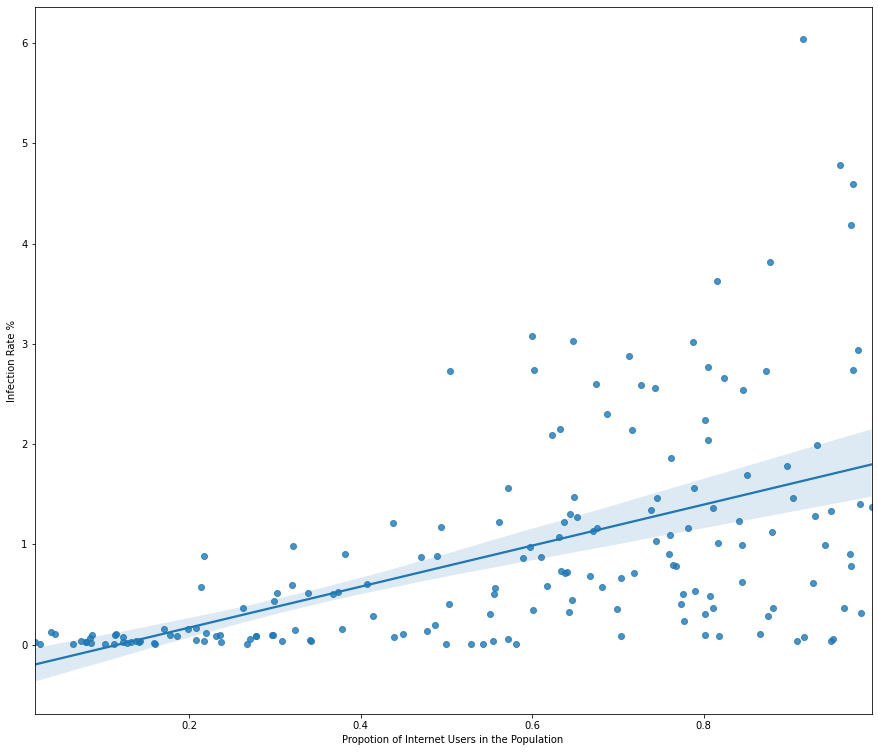

In [25]:
Internetfig1 = sns.regplot(scatter = True, data = Internetdf, fit_reg = True, x ='Proportion of Internet Users in the Population in 2017' , y = 'Infection Rate %')
Internetfig1.set(xlabel = "Propotion of Internet Users in the Population") 

[Text(0.5, 0, 'Proportion of Internet Users in the Population')]

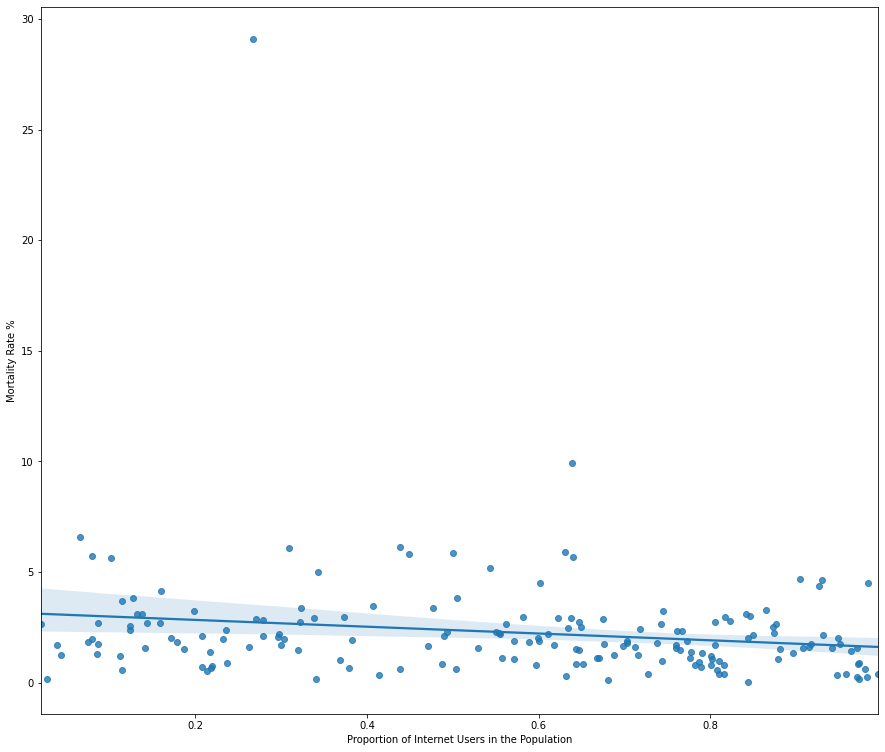

In [26]:
Internetfig2 = sns.regplot(scatter = True, data = Internetdf, fit_reg = True, x = 'Proportion of Internet Users in the Population in 2017', y = 'Mortality Rate %')
Internetfig2.set(xlabel = "Proportion of Internet Users in the Population")

# Hypothesis Testing for Proportion of Internet Users in the Population
Null Hypothesis 1: There is no correlation between the Proportion of Internet Users and Infection Rate

Null Hypothesis 2: There is no correlation between the Proportion of Internet Users and Mortality Rate

Alternative Hypothesis 1: There is a correlation between the Proportion of Internet Users and Infection Rate

Alternative Hypothesis 2: There is a correlation between the Proportion of Internet Users and Mortality Rate

We'll be using a two tailed test with a 5% confidence interval (95% confidence interval). As long as the P value is smaller than 0.05, we can reject the null hypothesis and affirm our alternative hypothesis.


In [27]:
r31 = st.pearsonr(x = Internetdf['Proportion of Internet Users in the Population in 2017'], y = Internetdf['Infection Rate %'])
print("The correlation coefficient between Proportion of Internet Users in the Population in 2017 and Infection Rate is", r21[0])
print("The P value is", r31[1], "therefore we can reject our null hypothesis.")

r32 = st.pearsonr(x = Internetdf['Proportion of Internet Users in the Population in 2017'], y = Internetdf['Mortality Rate %'])
print("The correlation coefficient between Proportion of Internet Users in the Population in 2017 and Mortality Rate is", r22[0])
print("The P value is", r32[1], "therefore we can reject our null hypothesis.")

The correlation coefficient between Proportion of Internet Users in the Population in 2017 and Infection Rate is 0.12321031652286817
The P value is 9.490625056307999e-15 therefore we can reject our null hypothesis.
The correlation coefficient between Proportion of Internet Users in the Population in 2017 and Mortality Rate is -0.14316435809002664
The P value is 0.021232451507479416 therefore we can reject our null hypothesis.


[Text(0.5, 0, 'Gini Index (Most Recent from 2015 - 2018)')]

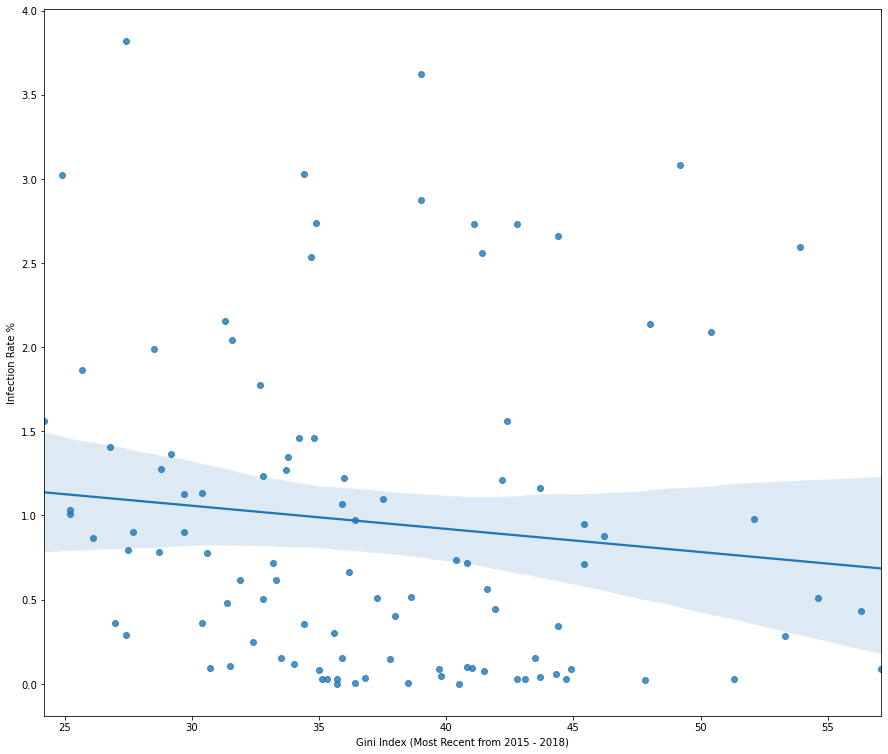

In [28]:
inequalitydf = removeoutlier(df, 'Most Recent Gini Index')
inequalitydf = inequalitydf[inequalitydf['Most Recent Gini Index'].notna()]

ginifig1 = sns.regplot(scatter = True, data = inequalitydf, fit_reg = True, x = 'Most Recent Gini Index', y = 'Infection Rate %')
ginifig1.set(xlabel = "Gini Index (Most Recent from 2015 - 2018)")

[Text(0.5, 0, 'Gini Index (Most Recent from 2015 - 2018)')]

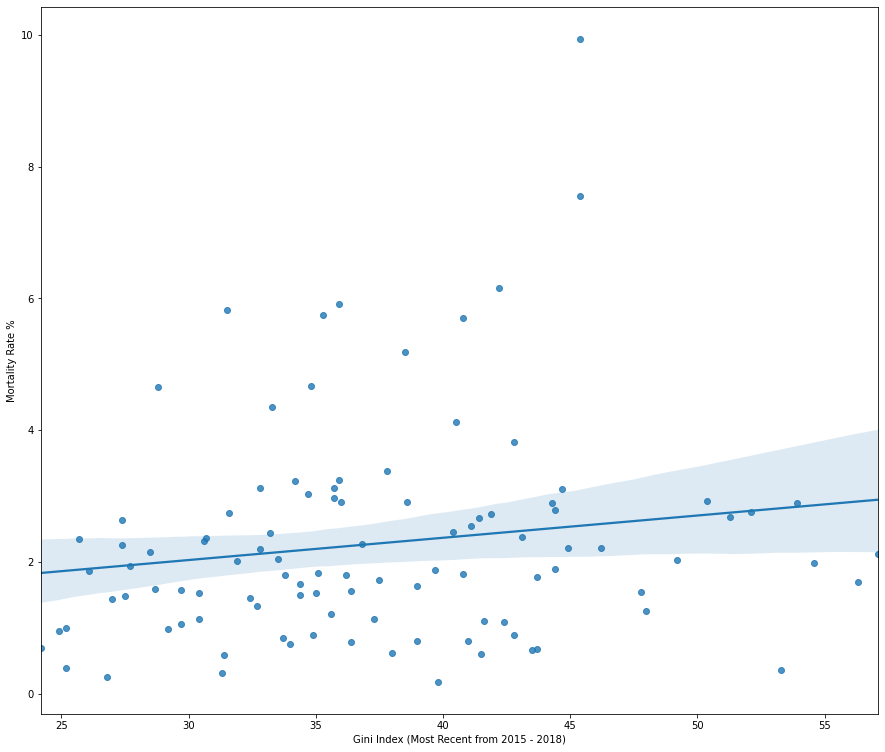

In [29]:
ginifig2 = sns.regplot(scatter = True, data = inequalitydf, fit_reg = True, x = 'Most Recent Gini Index', y = 'Mortality Rate %')
ginifig2.set(xlabel = "Gini Index (Most Recent from 2015 - 2018)")

# Hypothesis Testing for Inequality

Null Hypothesis 1: There is no correlation between the Level of Inequality and Infection Rate

Null Hypothesis 2: There is no correlation between the Level of Inequality and Mortality Rate

Alternative Hypothesis 1: There is a correlation between the Level of Inequality and Infection Rate

Alternative Hypothesis 2: There is a correlation between the Level of Inequality and Mortality Rate

We'll be using a two tailed test with a 5% confidence interval (95% confidence interval). As long as the P value is smaler than 0.05, we can reject the null hypothesis and affirm our alternative hypothesis.


In [30]:
r41 = st.pearsonr(x = inequalitydf['Most Recent Gini Index'], y = inequalitydf['Infection Rate %'])
print("The correlation coefficient between the most recent Gini Index and Infection Rate is", r41[0])
print("The P value is", r41[1], "therefore we fail to reject our null hypothesis.")

r42 = st.pearsonr(x = inequalitydf['Most Recent Gini Index'], y = inequalitydf['Mortality Rate %'])
print("The correlation coefficient between most recent Gini Index and Mortality Rate is", r42[0])
print("The P value is", r42[1], "therefore we fail to reject our null hypothesis.")

The correlation coefficient between the most recent Gini Index and Infection Rate is -0.11017235357320487
The P value is 0.2679232332580459 therefore we fail to reject our null hypothesis.
The correlation coefficient between most recent Gini Index and Mortality Rate is 0.15958179529003005
The P value is 0.10736525968257568 therefore we fail to reject our null hypothesis.


# Regression Analysis 

We'll split the data in 80:20 train set and test set.
We'll perform multiple linear regression and select a handful of independent variables that will yield us the best model.
We'll find recursively remove variables that are not within the 95% significance level range.
Then we'll perform further analysis to determine which model is most fitting with the following tools:
1. Adjusted R-Square Value 
2. Fisher Statistic
3. Residual Standard Errors

In [31]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from math import e
from random import sample
from sklearn.model_selection import train_test_split

In [32]:
dfcopy = df.copy()
dfcopy = dfcopy[["GDP per Capita", "Population Density", "Most Recent Gini Index", "Proportion of Internet Users in the Population in 2017", "Infection Rate %", "Mortality Rate %"]]
dfcopy = dfcopy.dropna()
dfcopy.isnull().sum()
idx = [i for i in range(len(dfcopy))]
dfcopy.index = idx
dfcopy.reset_index(drop=True, inplace=True)



In [33]:
x = dfcopy[["GDP per Capita", "Population Density", "Most Recent Gini Index", "Proportion of Internet Users in the Population in 2017"]]
y = dfcopy[["Infection Rate %", "Mortality Rate %"]]

In [34]:
x.head(5)

,GDP per Capita,Population Density,Most Recent Gini Index,Proportion of Internet Users in the Population in 2017
0,5819.495,23.890,51.3,0.143391
1,11803.431,104.871,33.2,0.718470
2,18933.907,16.177,41.4,0.742949
3,8787.580,102.931,34.4,0.647449
4,45436.686,106.749,29.7,0.879356


In [35]:
y.head(5)

,Infection Rate %,Mortality Rate %
0,0.031245,2.677963
1,0.717006,2.432878
2,2.560341,2.660984
3,3.030911,1.493102
4,1.126343,1.063652


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(81, 4)

(81, 2)

(21, 4)

(21, 2)

We have split our data into two sets and the sets are further divided into the dependent variable.

# Multiple Linear Regression Analysis: Infection Rate %

In [37]:
temp = y_train["Infection Rate %"]

# Trial 1:

In [38]:
one = x_train.copy()
one = sm.add_constant(x_train)
model = sm.OLS(temp, one).fit()
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Infection Rate %   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     10.64
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           6.73e-07
Time:                        16:49:53   Log-Likelihood:                -95.693
No. Observations:                  81   AIC:                             201.4
Df Residuals:                      76   BIC:                             213.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.5220      0.667     -2.283      0.025      -2.850      -0.194
GDP per Capita                                         -7.689e-06   9.94e-06     -0.774      0.442   -2.75e-05    1.21e-05
Population Density                                         0.0005      0.000      1.217      0.227      -0.000       0.001
Most Recent Gini Index                                     0.0245      0.014      1.795      0.077      -0.003       0.052
Proportion of Internet Users in the Population in 2017     2.9205      0.612      4.774      0.000       1.702       4.139
==============================================================================
Omnibus:                        9.996   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.867
Skew:                           0.801   Prob(JB):                      0.00720
Kurtosis:                       3.597   Cond. No.                     2.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Trial 2

In [39]:
two = x_train.copy().drop(columns = ["GDP per Capita"])
two = sm.add_constant(x_train)
model = sm.OLS(temp, two).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Infection Rate %   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     10.64
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           6.73e-07
Time:                        16:49:53   Log-Likelihood:                -95.693
No. Observations:                  81   AIC:                             201.4
Df Residuals:                      76   BIC:                             213.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.5220      0.667     -2.283      0.025      -2.850      -0.194
GDP per Capita                                         -7.689e-06   9.94e-06     -0.774      0.442   -2.75e-05    1.21e-05
Population Density                                         0.0005      0.000      1.217      0.227      -0.000       0.001
Most Recent Gini Index                                     0.0245      0.014      1.795      0.077      -0.003       0.052
Proportion of Internet Users in the Population in 2017     2.9205      0.612      4.774      0.000       1.702       4.139
==============================================================================
Omnibus:                        9.996   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.867
Skew:                           0.801   Prob(JB):                      0.00720
Kurtosis:                       3.597   Cond. No.                     2.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Trial 3

In [40]:
three = x_train.copy().drop(columns = ["GDP per Capita", "Population Density"])
three = sm.add_constant(x_train)
model = sm.OLS(temp, three).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Infection Rate %   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     10.64
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           6.73e-07
Time:                        16:49:53   Log-Likelihood:                -95.693
No. Observations:                  81   AIC:                             201.4
Df Residuals:                      76   BIC:                             213.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.5220      0.667     -2.283      0.025      -2.850      -0.194
GDP per Capita                                         -7.689e-06   9.94e-06     -0.774      0.442   -2.75e-05    1.21e-05
Population Density                                         0.0005      0.000      1.217      0.227      -0.000       0.001
Most Recent Gini Index                                     0.0245      0.014      1.795      0.077      -0.003       0.052
Proportion of Internet Users in the Population in 2017     2.9205      0.612      4.774      0.000       1.702       4.139
==============================================================================
Omnibus:                        9.996   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.867
Skew:                           0.801   Prob(JB):                      0.00720
Kurtosis:                       3.597   Cond. No.                     2.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Trial 4

In [41]:
four = x_train.copy().drop(columns = ["GDP per Capita", "Population Density", "Most Recent Gini Index"])
four = sm.add_constant(four)
model = sm.OLS(temp, four).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Infection Rate %   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     36.38
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           4.95e-08
Time:                        16:49:53   Log-Likelihood:                -98.361
No. Observations:                  81   AIC:                             200.7
Df Residuals:                      79   BIC:                             205.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -0.2620      0.227     -1.154      0.252      -0.714       0.190
Proportion of Internet Users in the Population in 2017     2.2050      0.366      6.031      0.000       1.477       2.933
==============================================================================
Omnibus:                       10.608   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.707
Skew:                           0.852   Prob(JB):                      0.00473
Kurtosis:                       3.519   Cond. No.                         5.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Trial 5

In [42]:
five = four.drop(columns = ["const"])
model = sm.OLS(temp, five).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Infection Rate %   R-squared (uncentered):                   0.654
Model:                            OLS   Adj. R-squared (uncentered):              0.650
Method:                 Least Squares   F-statistic:                              151.2
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                    4.03e-20
Time:                        16:49:53   Log-Likelihood:                         -99.038
No. Observations:                  81   AIC:                                      200.1
Df Residuals:                      80   BIC:                                      202.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Proportion of Internet Users in the Population in 2017     1.8191      0.148     12.295      0.000       1.525       2.114
==============================================================================
Omnibus:                       14.608   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.193
Skew:                           1.045   Prob(JB):                     0.000305
Kurtosis:                       3.659   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using a model on the test set:

In [43]:
temp2 = model.predict(x_test["Proportion of Internet Users in the Population in 2017"])
testResult = y_test.copy().drop(columns = {"Mortality Rate %"})

testResult["Predicted Infection Rate"] = temp2
testResult['SSD'] = (testResult['Infection Rate %'] - testResult['Predicted Infection Rate'])**2
SSD = testResult['SSD'].sum()
RSE = np.sqrt(SSD / 496)
mean = np.mean(testResult['Infection Rate %'])
error = RSE / mean

print(f'RSE = {RSE}\nMean = {mean}\nError = {np.round(error, 4)*100}%')

RSE = 0.1470114767973665
Mean = 0.8378371495265631
Error = 17.549999999999997%


# Result 1: Our fifth model is the best fitting model. Despite that, we observe that the model predictive capabilities is relatively weak from the various statistics.

# Correlation Analysis: Mortality Rate

In [44]:
temp = y_train["Mortality Rate %"]

# Trial 1

In [45]:
one = x_train.copy()
one = sm.add_constant(one)
model = sm.OLS(temp, one).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mortality Rate %   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.475
Date:                Wed, 23 Dec 2020   Prob (F-statistic):              0.218
Time:                        16:49:53   Log-Likelihood:                -146.43
No. Observations:                  81   AIC:                             302.9
Df Residuals:                      76   BIC:                             314.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      1.9218      1.247      1.541      0.128      -0.563       4.406
GDP per Capita                                          1.741e-05   1.86e-05      0.936      0.352   -1.96e-05    5.44e-05
Population Density                                        -0.0012      0.001     -1.695      0.094      -0.003       0.000
Most Recent Gini Index                                     0.0214      0.025      0.841      0.403      -0.029       0.072
Proportion of Internet Users in the Population in 2017    -1.1310      1.144     -0.988      0.326      -3.410       1.148
==============================================================================
Omnibus:                       54.256   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.618
Skew:                           2.080   Prob(JB):                     9.28e-53
Kurtosis:                      10.327   Cond. No.                     2.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Trial 2

In [46]:
two = x_train.copy().drop(columns = ["Most Recent Gini Index"])
two = sm.add_constant(two)
model = sm.OLS(temp, two).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mortality Rate %   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.737
Date:                Wed, 23 Dec 2020   Prob (F-statistic):              0.166
Time:                        16:49:53   Log-Likelihood:                -146.81
No. Observations:                  81   AIC:                             301.6
Df Residuals:                      77   BIC:                             311.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      2.8956      0.465      6.233      0.000       1.970       3.821
GDP per Capita                                          1.496e-05   1.83e-05      0.816      0.417   -2.15e-05    5.15e-05
Population Density                                        -0.0013      0.001     -1.913      0.059      -0.003    5.36e-05
Proportion of Internet Users in the Population in 2017    -1.3114      1.122     -1.169      0.246      -3.546       0.923
==============================================================================
Omnibus:                       56.429   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.992
Skew:                           2.146   Prob(JB):                     3.88e-59
Kurtosis:                      10.828   Cond. No.                     1.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Trial 3

In [47]:
three = x_train.copy().drop(columns = ["Most Recent Gini Index", "GDP per Capita"])
three = sm.add_constant(three)
model = sm.OLS(temp, three).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mortality Rate %   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.282
Date:                Wed, 23 Dec 2020   Prob (F-statistic):              0.109
Time:                        16:49:53   Log-Likelihood:                -147.16
No. Observations:                  81   AIC:                             300.3
Df Residuals:                      78   BIC:                             307.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      2.7540      0.430      6.404      0.000       1.898       3.610
Population Density                                        -0.0013      0.001     -1.946      0.055      -0.003    3.06e-05
Proportion of Internet Users in the Population in 2017    -0.5791      0.672     -0.862      0.392      -1.917       0.759
==============================================================================
Omnibus:                       55.346   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.274
Skew:                           2.127   Prob(JB):                     1.22e-54
Kurtosis:                      10.448   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Trial 4

In [48]:
four = x_train.copy().drop(columns = ["Population Density", "Most Recent Gini Index", "GDP per Capita"])
four = sm.add_constant(four)
model = sm.OLS(temp, four).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mortality Rate %   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7500
Date:                Wed, 23 Dec 2020   Prob (F-statistic):              0.389
Time:                        16:49:53   Log-Likelihood:                -149.08
No. Observations:                  81   AIC:                             302.2
Df Residuals:                      79   BIC:                             306.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      2.5521      0.425      6.010      0.000       1.707       3.397
Proportion of Internet Users in the Population in 2017    -0.5922      0.684     -0.866      0.389      -1.953       0.769
==============================================================================
Omnibus:                       54.370   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.080
Skew:                           2.102   Prob(JB):                     1.48e-51
Kurtosis:                      10.189   Cond. No.                         5.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Result 2: We are unable to form a model between the Mortality Rate and Socio-economic factors. 

# Inference and Discussion

From our correlation analysis, we observe that GDP per Capita has a positive correlation with the infection rate.
We also observed that there is postive correlation with the proportion of internet users and infection rate, while having negative correaltion with mortality rates.

From our regression analysis, we are only able to form a simple linear regression model between the proportion of internet users and infection rates albeit a rather poor one. 

The results from this study is relatively suprising and goes against our intuition: a richer and better developed nation will more likely have higher infection rates?! How?







1. Information Dissemination

More developed nations (i.e higher internet access rates) also will find the dissemination of information regarding symptomps and preventative measures. Thus, this is reflected in our correlation analysis. As more people become aware of the pandemic, the population would be more likely to take cautionary measures such as undergoing tests. Recognizing the symptoms and receiving treatment early on would therefore results in less deaths overall.
         
2. Data Issues

In the wise words of Donald Trump:
“Cases are going up in the U.S. because we are testing far more than any other country, and ever expanding,” Trump tweeted Tuesday. “With smaller testing we would show fewer cases!”
    
Indeed, richer and more developed countries tend to have more resources (infrastrucutre, medical professionals) to perform testing on a larger scale. Hence, countries with higher GDP per Capita will be more likely to have more complete and accurate that could be analyzed. Therefore, the results shown above is actually the outcome of testing standards rather than the relationship between the factors and the dependent variable.

It is also important to note that the pandemic is still ongoing. Epidemic waves repeatedly come and go between intervals, thus the current data that we are using is simply a snippet of the bigger picture and the full effects of the pandemic have not been realised. Unfortunately, we can only wait for the future to tell us how everything would eventually play out. 


# Conclusion
From the results of our data, we can ultimately conclude that equipping nations with better infrastrucuture to not only test and treat patient but also spreading information regarding the pandemic is crucial for them to combat such a pandemic.
The coronovirus pandemic isn't the first, nor the last pandemic that we will face (hopefully), but continously improving communication and medical technologies might probably be the only way for us to stay ahead of a super pandemic.